In [25]:
# import libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Define the fields to extract from t100 data.  Current link to pull csv files: https://transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=GDM&QO_fu146_anzr=
desired_fields = [
    "DEPARTURES_SCHEDULED",
    "DEPARTURES_PERFORMED",
    "PAYLOAD",
    "SEATS",
    "PASSENGERS",
    "FREIGHT",
    "MAIL",
    "DISTANCE",
    "RAMP_TO_RAMP",
    "AIR_TIME",
    "UNIQUE_CARRIER",
    "REGION",
    "CARRIER",
    "ORIGIN",
    "DEST",
    "AIRCRAFT_TYPE",
    "YEAR",
    "MONTH",
    "CLASS"
]

# Directory where csv files are located
data_directory = 'T100_Data'

# List to store DataFrames from each year
all_dataframes = []

# Loop through the years 2018 to 2024
for year in range(2018, 2025):
    filename = f"T_T100_SEGMENT_US_CARRIER_ONLY_{year}.csv"
    filepath = os.path.join(data_directory, filename)

    # Check if the file exists before trying to read it
    if os.path.exists(filepath):
        try:
            df = pd.read_csv(filepath, usecols=desired_fields)
            all_dataframes.append(df)
        except FileNotFoundError:
            print(f"File not found: {filepath}")
        except pd.errors.EmptyDataError:
            print(f"Empty data file: {filepath}")
        except Exception as e:
            print(f"Error reading {filepath}: {e}")
    else:
      print(f"{filepath} does not exist.")

# Concatenate all DataFrames into a single DataFrame
if all_dataframes: #Check if the list is not empty
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    print(combined_df.head())
    print(combined_df['YEAR'].unique())
else:
    print("No dataframes were loaded.")

   DEPARTURES_SCHEDULED  DEPARTURES_PERFORMED  PAYLOAD  SEATS  PASSENGERS  \
0                   0.0                   0.0      0.0    0.0         0.0   
1                   0.0                   0.0      0.0    0.0         0.0   
2                   0.0                   0.0      0.0    0.0         0.0   
3                   0.0                   0.0      0.0    0.0         0.0   
4                   0.0                   0.0      0.0    0.0         0.0   

   FREIGHT  MAIL  DISTANCE  RAMP_TO_RAMP  AIR_TIME UNIQUE_CARRIER REGION  \
0      0.0   0.0       9.0           0.0       0.0             MW      D   
1      0.0   0.0       9.0           0.0       0.0             MW      D   
2      0.0   0.0      10.0           0.0       0.0             MW      D   
3      0.0   0.0      10.0           0.0       0.0             MW      D   
4      0.0   0.0      16.0           0.0       0.0             MW      D   

  CARRIER ORIGIN DEST  AIRCRAFT_TYPE  YEAR  MONTH CLASS  
0      MW    LUP  MKK 

In [27]:
# Filter for Delta (Carrier Code: DL)
df_delta = combined_df[combined_df["CARRIER"].str.contains("DL")]

df_delta = df_delta[df_delta['DEPARTURES_SCHEDULED'] != 0]

df_delta['MARKET'] = df_delta['ORIGIN'] + '-' + df_delta['DEST']

# Create a YEAR-MONTH column
df_delta['YEAR-MONTH'] = df_delta['YEAR'].astype(str) + '-' + df_delta['MONTH'].astype(str).str.zfill(2)

print(df_delta.head())
print(df_delta.shape)


        DEPARTURES_SCHEDULED  DEPARTURES_PERFORMED  PAYLOAD  SEATS  \
117245                   1.0                   0.0      0.0    0.0   
117255                   1.0                   0.0      0.0    0.0   
117256                   1.0                   0.0      0.0    0.0   
117257                   1.0                   0.0      0.0    0.0   
117259                   1.0                   0.0      0.0    0.0   

        PASSENGERS  FREIGHT  MAIL  DISTANCE  RAMP_TO_RAMP  AIR_TIME  ...  \
117245         0.0      0.0   0.0     224.0           0.0       0.0  ...   
117255         0.0      0.0   0.0     321.0           0.0       0.0  ...   
117256         0.0      0.0   0.0     321.0           0.0       0.0  ...   
117257         0.0      0.0   0.0     332.0           0.0       0.0  ...   
117259         0.0      0.0   0.0     366.0           0.0       0.0  ...   

       REGION CARRIER ORIGIN DEST AIRCRAFT_TYPE  YEAR  MONTH  CLASS   MARKET  \
117245      D      DL    SEA  GEG         

In [28]:
# Load the aircraft type mapping
aircraft_types = pd.read_csv('T100_Data/L_AIRCRAFT_TYPE.csv')

aircraft_types.head()

,Code,Description
0,7,Aero Commander 200
1,8,Aero Macchi AL-60
2,9,Aeronca 7-AC
3,10,Beech Bonanza 35A/C/D/E/G/H/J/K/S/V/ 36A
4,20,Bellanca CH-300


In [29]:
# Merge the aircraft type descriptions into the main df
df_delta = pd.merge(df_delta, aircraft_types, left_on='AIRCRAFT_TYPE', right_on='Code', how='left')

# Drop redundant 'Code' column from the merge
df_delta = df_delta.drop(['Code', 'AIRCRAFT_TYPE'], axis=1)

df_delta = df_delta.rename(columns={'Description': 'AC_TYPE'})

print(df_delta.head())
print(df_delta.shape)
print(df_delta.dtypes)

df_delta.to_csv('load_factor_data.csv', index=False)


   DEPARTURES_SCHEDULED  DEPARTURES_PERFORMED  PAYLOAD  SEATS  PASSENGERS  \
0                   1.0                   0.0      0.0    0.0         0.0   
1                   1.0                   0.0      0.0    0.0         0.0   
2                   1.0                   0.0      0.0    0.0         0.0   
3                   1.0                   0.0      0.0    0.0         0.0   
4                   1.0                   0.0      0.0    0.0         0.0   

   FREIGHT  MAIL  DISTANCE  RAMP_TO_RAMP  AIR_TIME  ... REGION CARRIER ORIGIN  \
0      0.0   0.0     224.0           0.0       0.0  ...      D      DL    SEA   
1      0.0   0.0     321.0           0.0       0.0  ...      D      DL    ATL   
2      0.0   0.0     321.0           0.0       0.0  ...      D      DL    SDF   
3      0.0   0.0     332.0           0.0       0.0  ...      D      DL    ATL   
4      0.0   0.0     366.0           0.0       0.0  ...      D      DL    ATL   

  DEST  YEAR  MONTH  CLASS   MARKET YEAR-MONTH    

In [30]:
# Group by YEAR-MONTH and MARKET and calculate the mean load factor
load_factor_summary = df_delta.groupby(['YEAR-MONTH', 'MARKET', 'REGION'])['PASSENGERS', 'SEATS'].mean().reset_index()

load_factor_summary['LOAD_FACTOR'] = load_factor_summary['PASSENGERS'] / load_factor_summary['SEATS']

load_factor_summary.to_csv('load_factors.csv', index=False)

C:\Users\gnieo\AppData\Local\Temp\ipykernel_10520\4021881345.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  load_factor_summary = df_delta.groupby(['YEAR-MONTH', 'MARKET', 'REGION'])['PASSENGERS', 'SEATS'].mean().reset_index()


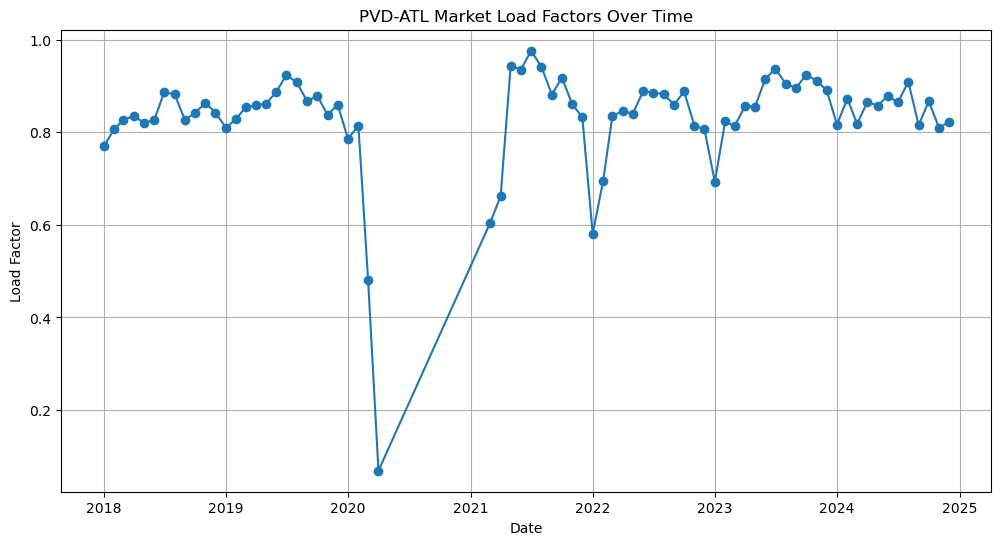

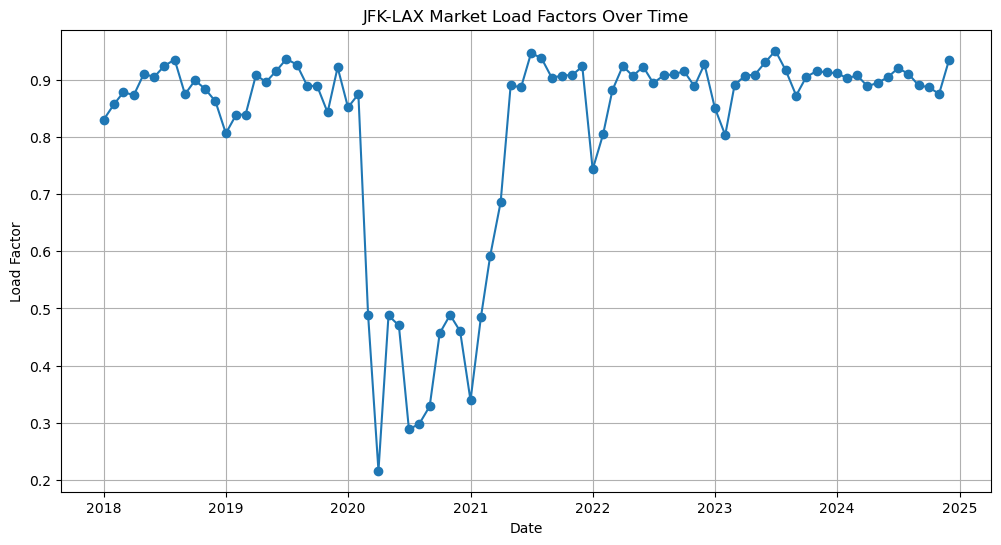

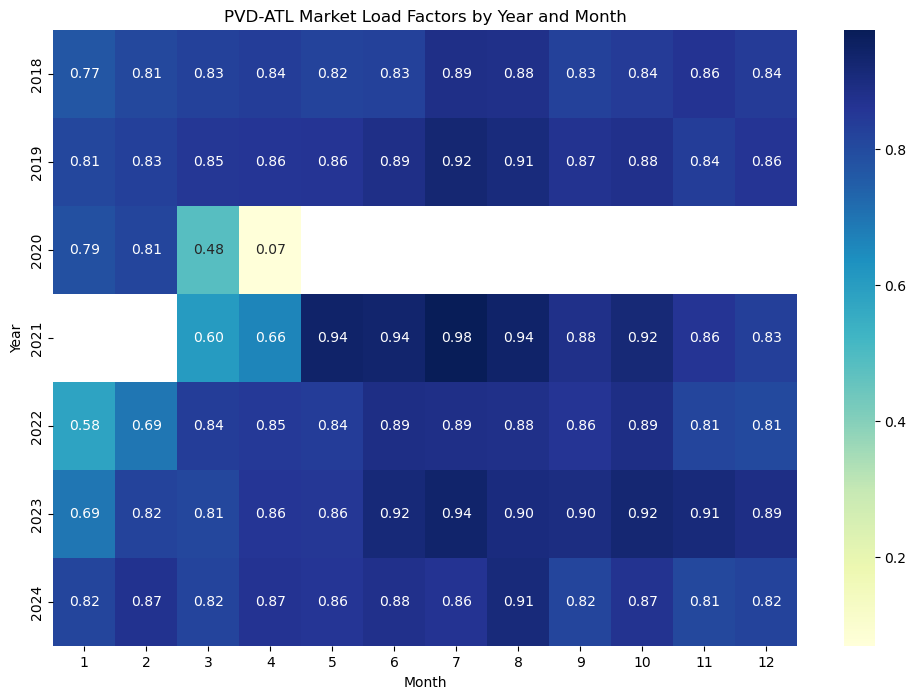

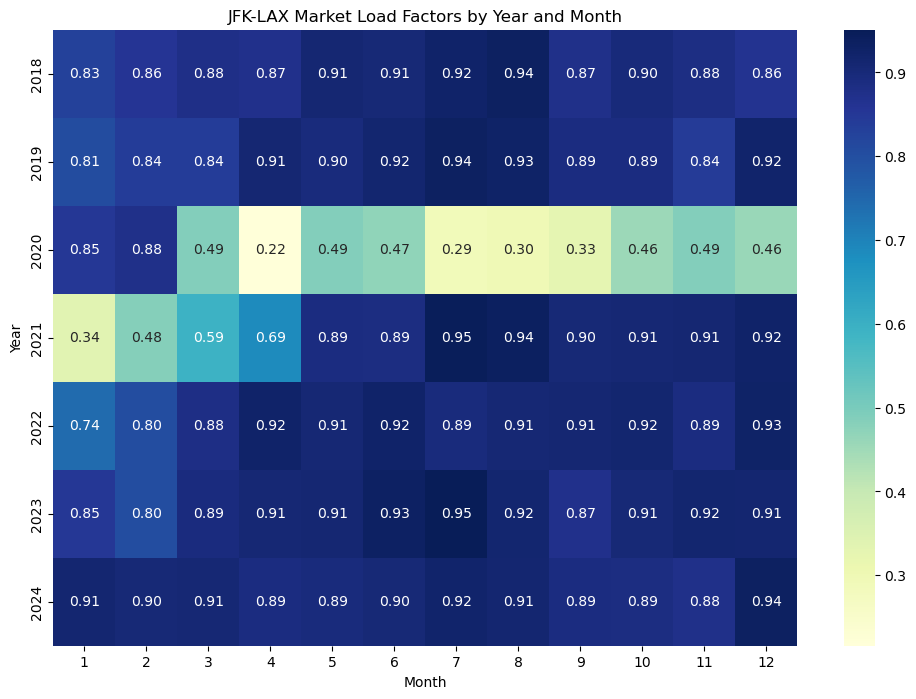

In [31]:
# Load load factor summary data
load_factor_summary = pd.read_csv('load_factors.csv')

# Define markets to analyze
selected_markets = ['PVD-ATL', 'JFK-LAX']  # Modify this list to include desired markets

# Filter for selected markets
data_filtered = load_factor_summary[load_factor_summary['MARKET'].isin(selected_markets)].copy()

# Split YEAR-MONTH column into separate YEAR and MONTH columns
data_filtered[['YEAR', 'MONTH']] = data_filtered['YEAR-MONTH'].str.split('-', expand=True)

# Convert YEAR and MONTH to numeric types
data_filtered['YEAR'] = pd.to_numeric(data_filtered['YEAR'])
data_filtered['MONTH'] = pd.to_numeric(data_filtered['MONTH'])

# Create combined date column for plotting
data_filtered['DATE'] = pd.to_datetime(data_filtered['YEAR'].astype(str) + '-' + data_filtered['MONTH'].astype(str), format='%Y-%m')

# Sort by date
data_filtered = data_filtered.sort_values(by='DATE')

# Create plots for each selected market
for market in selected_markets:
    market_data = data_filtered[data_filtered['MARKET'] == market]
    
    plt.figure(figsize=(12, 6))
    plt.plot(market_data['DATE'], market_data['LOAD_FACTOR'], marker='o')
    plt.title(f'{market} Market Load Factors Over Time')
    plt.xlabel('Date')
    plt.ylabel('Load Factor')
    plt.grid(True)
    plt.show()

# Create heatmaps for each selected market
for market in selected_markets:
    market_data = data_filtered[data_filtered['MARKET'] == market]
    heatmap_data = market_data.pivot_table(values='LOAD_FACTOR', index='YEAR', columns='MONTH')
    
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f'{market} Market Load Factors by Year and Month')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.show()

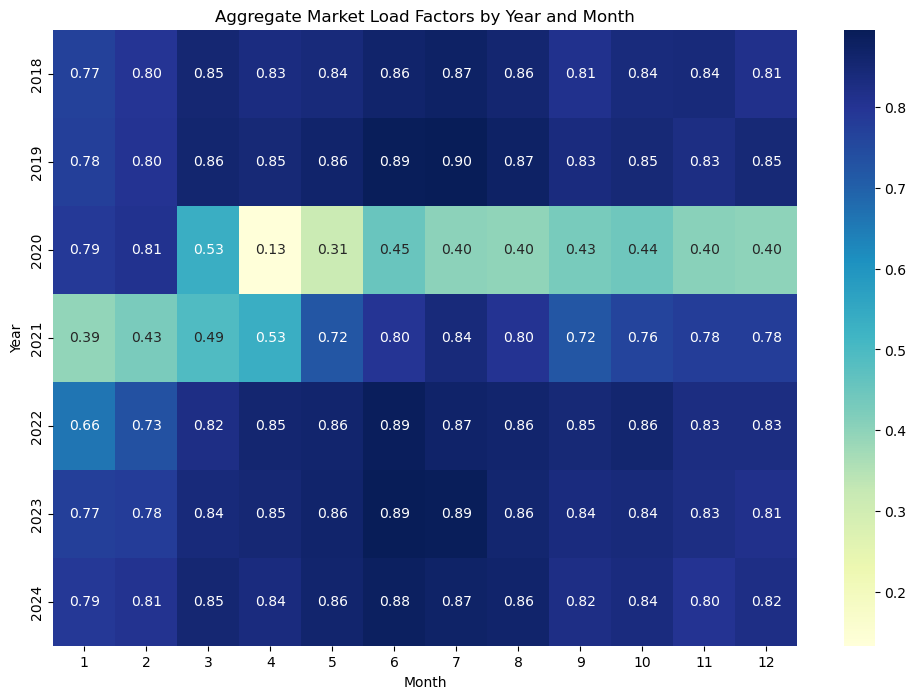

In [32]:
# System plot
# Load load factor summary data
load_factor_summary = pd.read_csv('load_factors.csv')

# Split YEAR-MONTH column into separate YEAR and MONTH columns
load_factor_summary[['YEAR', 'MONTH']] = load_factor_summary['YEAR-MONTH'].str.split('-', expand=True)

# Convert YEAR and MONTH to numeric types
load_factor_summary['YEAR'] = pd.to_numeric(load_factor_summary['YEAR'])
load_factor_summary['MONTH'] = pd.to_numeric(load_factor_summary['MONTH'])

# Aggregate load factors across all markets
aggregated_data = load_factor_summary.pivot_table(values='LOAD_FACTOR', index='YEAR', columns='MONTH', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(aggregated_data, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Aggregate Market Load Factors by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

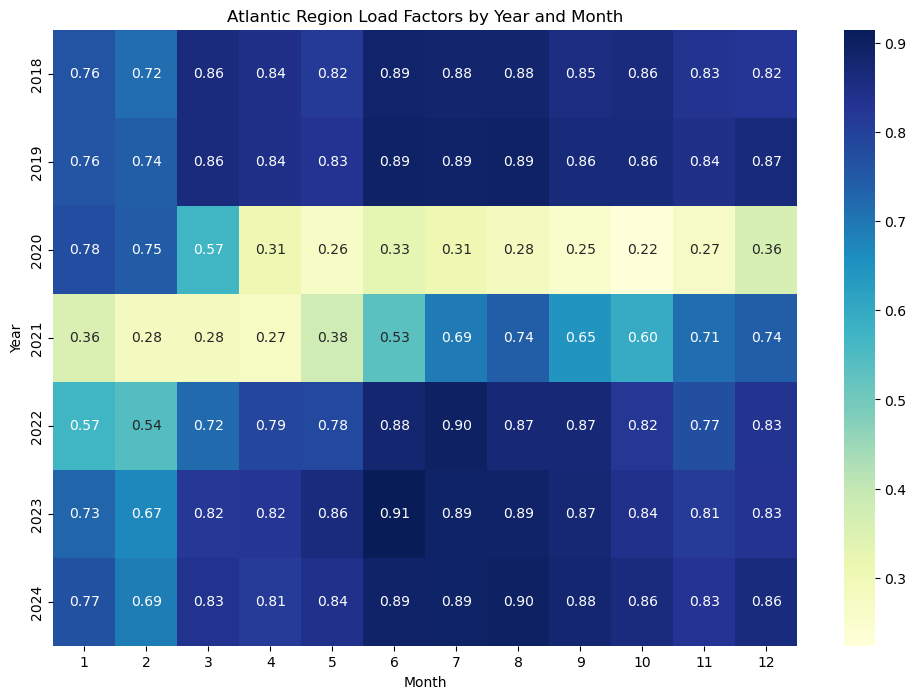

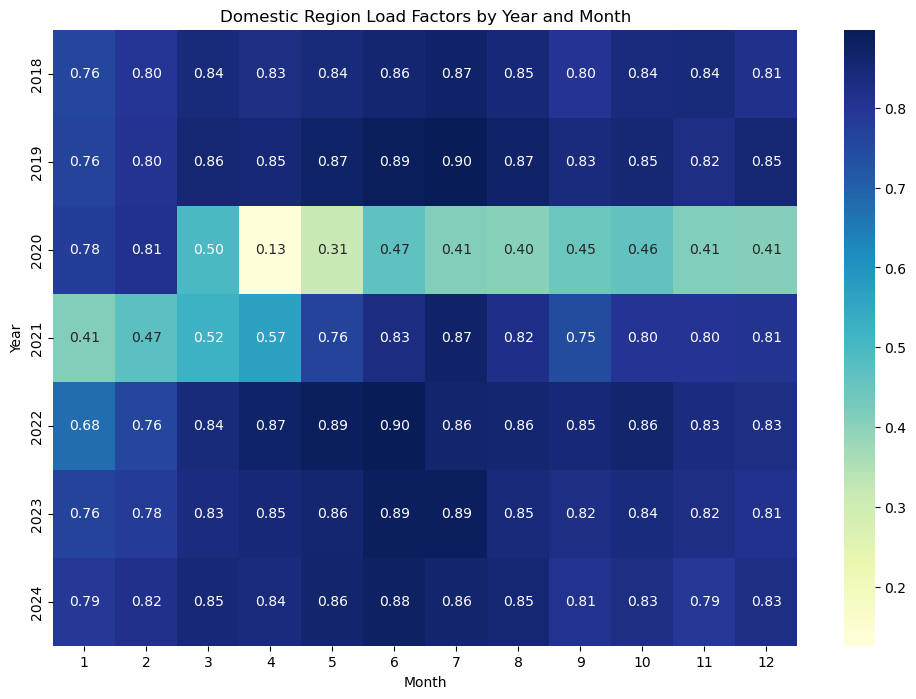

No data available for International region.


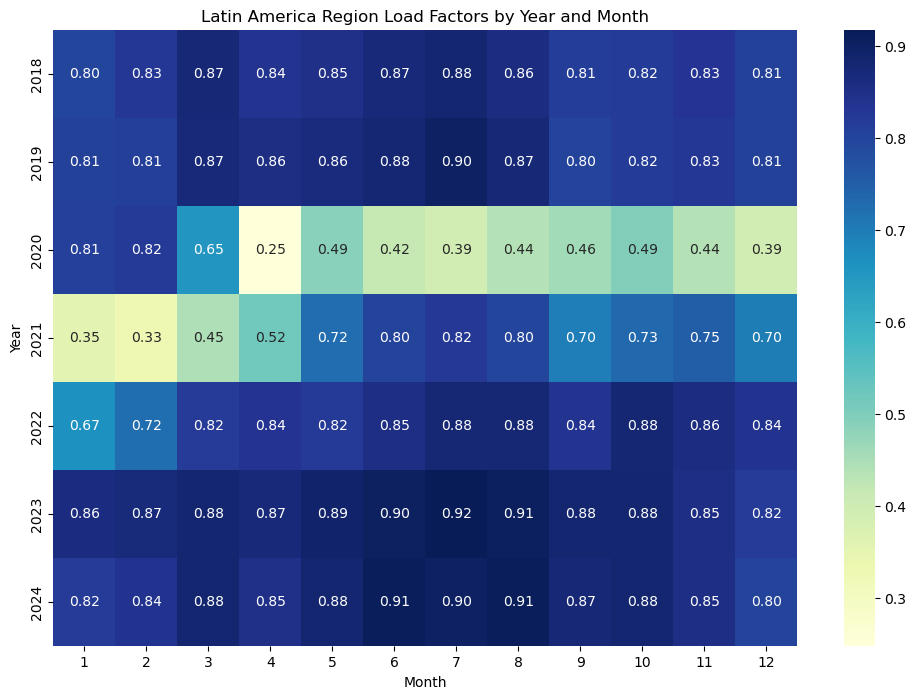

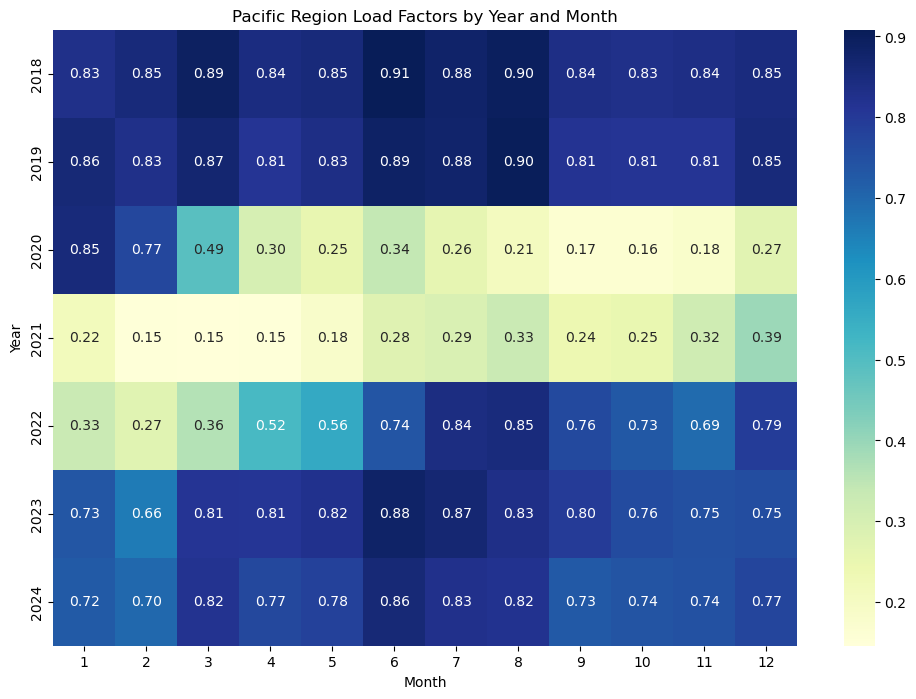

No data available for System region.


In [33]:
# Load load factor summary data
load_factor_summary = pd.read_csv('load_factors.csv')

# Split YEAR-MONTH column into separate YEAR and MONTH columns
load_factor_summary[['YEAR', 'MONTH']] = load_factor_summary['YEAR-MONTH'].str.split('-', expand=True)

# Convert YEAR and MONTH to numeric types
load_factor_summary['YEAR'] = pd.to_numeric(load_factor_summary['YEAR'])
load_factor_summary['MONTH'] = pd.to_numeric(load_factor_summary['MONTH'])

# Define regions
regions = {
    'A': 'Atlantic',
    'D': 'Domestic',
    'I': 'International',
    'L': 'Latin America',
    'P': 'Pacific',
    'S': 'System'
}

# Generate heatmaps for each region
for code, region in regions.items():
    region_data = load_factor_summary[load_factor_summary['REGION'] == code]
    
    # Check if region_data is empty
    if region_data.empty:
        print(f"No data available for {region} region.")
        continue
    
    aggregated_data = region_data.pivot_table(values='LOAD_FACTOR', index='YEAR', columns='MONTH', aggfunc='mean')
    
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(aggregated_data, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f'{region} Region Load Factors by Year and Month')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.show()